# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

# Importing Requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
## Loading the dataset
pd.set_option('display.max_columns',None)
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
## Checking shape of Dataset
df.shape

(1470, 35)

We have 1470 rows and 35 column including target Attribute.

Attrition is our Target Attribute.

This is a Classification Problem statement.

In [4]:
## Checking Datatype
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We can see that in our dataset 9 attributes have Object data Type and 24 attribute have integer datatype.

All datatype of our attributes are ok.

In [5]:
## Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that out of 1470 entries of data , all columns contains the same number of filled data.

Which mean there is no null values present in our dataset.

In [6]:
## Checking Null Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

NO null values present in our dataset.

<AxesSubplot:title={'center':'NUll values'}>

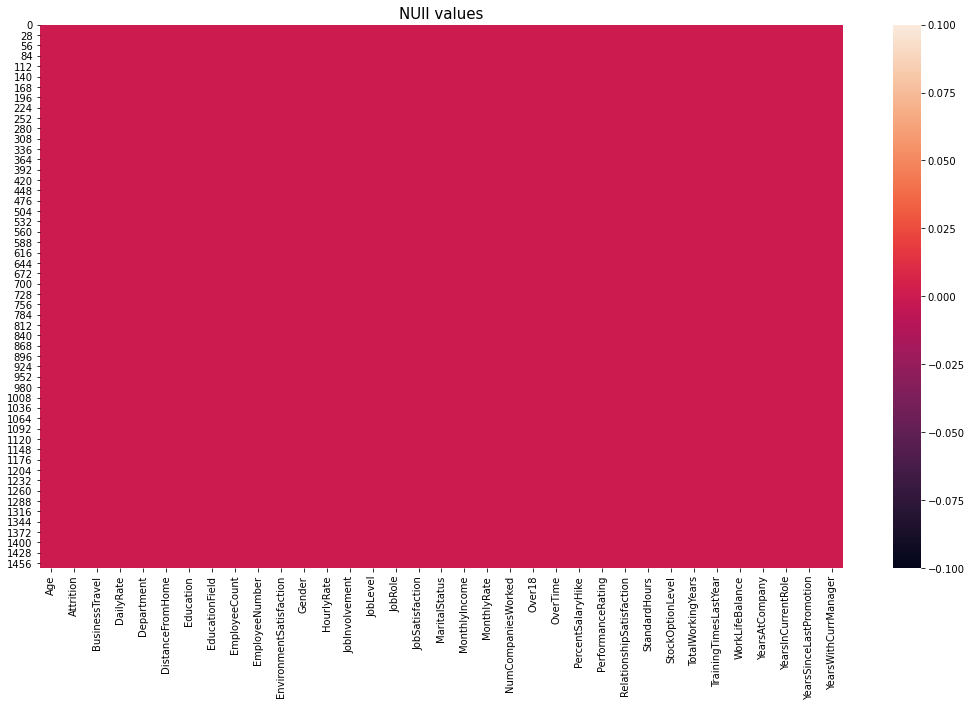

In [7]:
plt.figure(figsize=(18,10))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull())

NO null values present in our dataset.

In [8]:
## Statistical Summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


1-We can observe that MOnthly Income, MOnthly rate are Right skewed because Mean values is greater than the Median Values.

2- We can observe that for most of attribute the median values(50%) is near to it's mean value which shows that data is normally distributed.

3-In some columns such as StandardHours,EmployeeCount only single number is repeated, Means there is a constant values present which has no significance.

4- In columns such as StockOptionLevel,	TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole.YearsSinceLastPromotion,YearsWithCurrManager have the minimun values is Zero which shows that some new joining/Recent joining are also present in our Dataset.

In [9]:
## Checking the unique values in these columns.
print(df['EmployeeCount'].unique())
print(df['StandardHours'].unique())

[1]
[80]


In [10]:
## Dropping the duplicate columns
df_1=df.drop(['EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

We have drop EmployeeCount,StandardHours because it has only one unique values.

we have drop EmployeeCount,EmployeeNumber because it is just a counting number of employees , it has no significance for checking Attrition.

# Categorcial Attributes

In [11]:
## segregating the object datatype.
ob=df_1.select_dtypes(include='object')

In [12]:
## Checking values counts for each categorical columns
for col in ob:
    print('\n')
    print('---------------',col,'--------------------')
    print(df_1[col].value_counts())



--------------- Attrition --------------------
No     1233
Yes     237
Name: Attrition, dtype: int64


--------------- BusinessTravel --------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


--------------- Department --------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


--------------- EducationField --------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


--------------- Gender --------------------
Male      882
Female    588
Name: Gender, dtype: int64


--------------- JobRole --------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager      

observation:

1- we can see that our Target attribute is imbalance.(ration 4:1)

2-Over18 column has only one category. we can drop it further.


# Data Visualization:

<AxesSubplot:title={'center':'Target data Distribution'}, xlabel='Attrition', ylabel='count'>

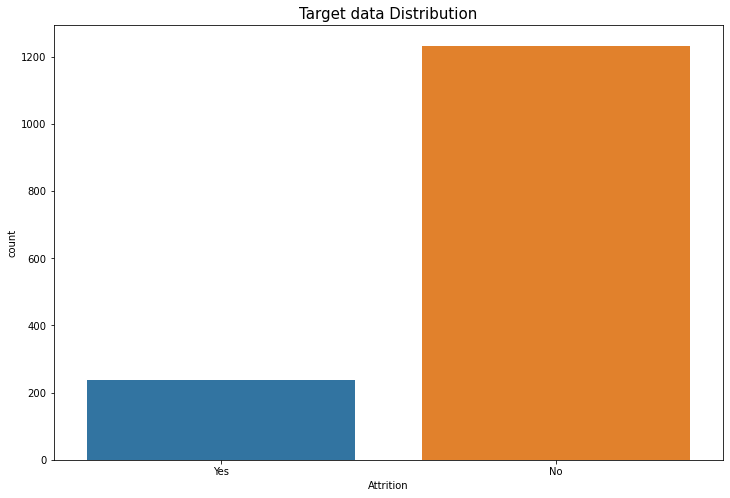

In [13]:
plt.figure(figsize=(12,8))
plt.title('Target data Distribution',fontsize=15)
sns.countplot(df_1['Attrition'],data=df_1)

We can see our data is Imbalance in nature because ratio is (4:1).

How to decide if data is balanced or imbalanced

refererence--https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

<AxesSubplot:title={'center':'Overtime vs Attrition Relation'}, xlabel='OverTime', ylabel='count'>

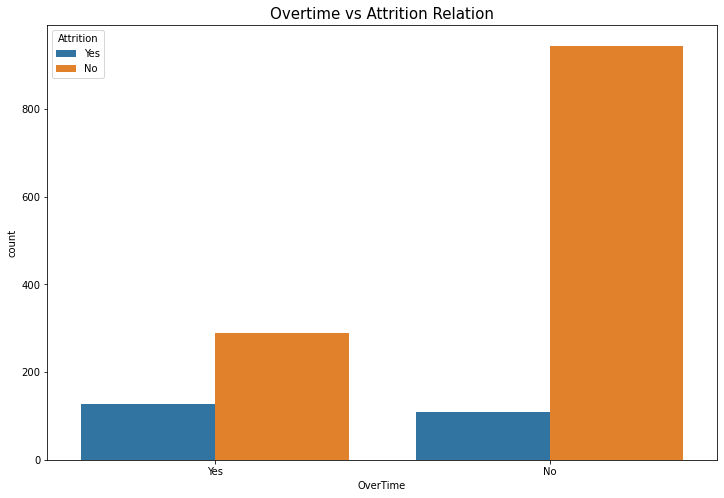

In [14]:
plt.figure(figsize=(12,8))
plt.title('Overtime vs Attrition Relation',fontsize=15)
sns.countplot(df_1['OverTime'],hue='Attrition',data=df_1)

we can see that people who do over time have higher chances to left the company as compair to person who don't do overtime.

<AxesSubplot:title={'center':'MaritalStatus vs Attrition Relation'}, xlabel='MaritalStatus', ylabel='count'>

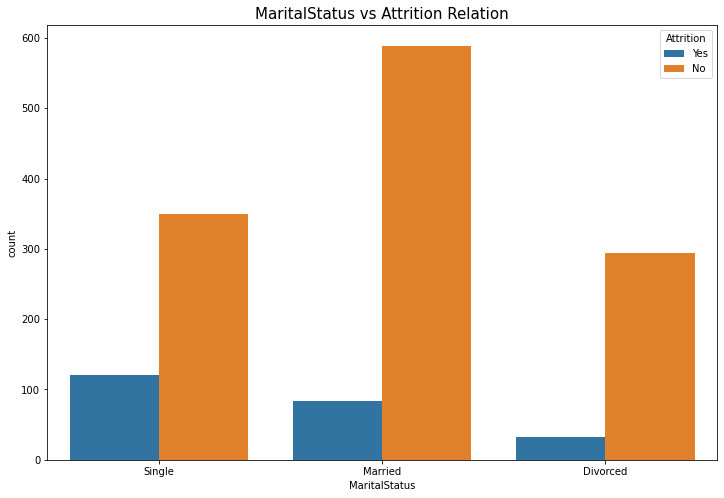

In [15]:
plt.figure(figsize=(12,8))
plt.title('MaritalStatus vs Attrition Relation',fontsize=15)
sns.countplot(df_1['MaritalStatus'],hue='Attrition',data=df_1)

We can see that, unmarried people have higher tendency to leave the company as comapired to Married.

Divorced/seperated has lowest chanaces to left the company.


<AxesSubplot:title={'center':'Job Role vs Attrition Relation'}, xlabel='JobRole', ylabel='count'>

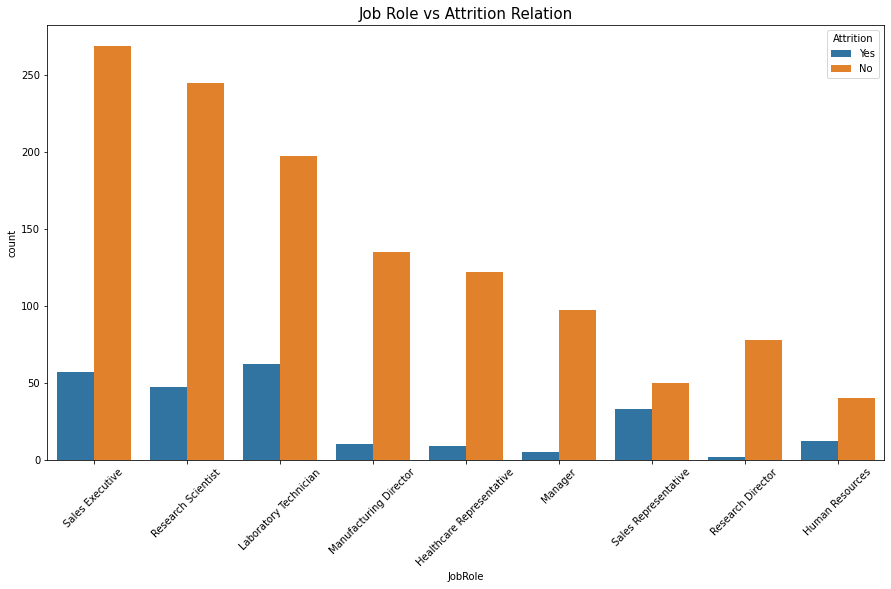

In [16]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Job Role vs Attrition Relation',fontsize=15)
sns.countplot(df_1['JobRole'],hue='Attrition',data=df_1)

Laboratory Technician ,Sales Executive, Sales representatives research scientis have higher tendency to leave job.

<AxesSubplot:title={'center':'Sex vs Attrition Relation'}, xlabel='Gender', ylabel='count'>

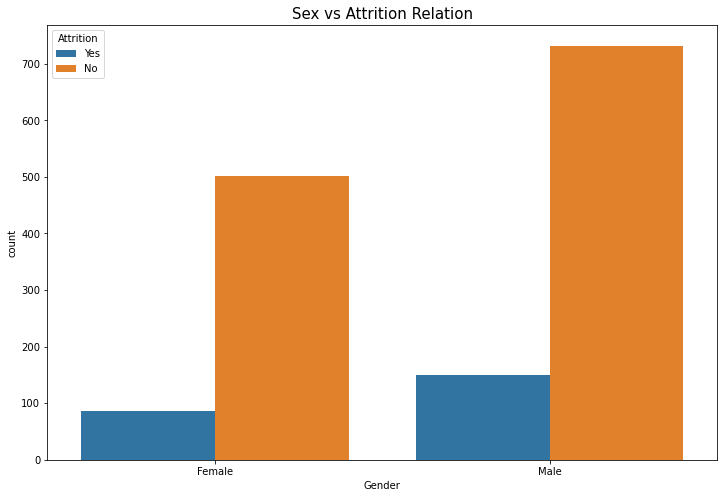

In [17]:
plt.figure(figsize=(12,8))
plt.title('Sex vs Attrition Relation',fontsize=15)
sns.countplot(df_1['Gender'],hue='Attrition',data=df_1)


<AxesSubplot:title={'center':'Sex vs Attrition'}, xlabel='Gender', ylabel='count'>

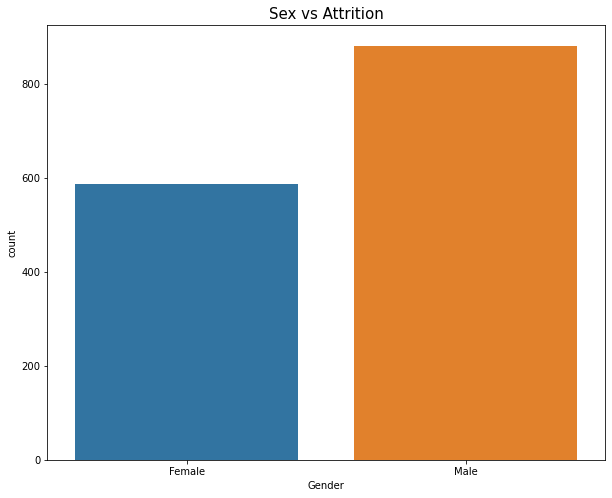

In [18]:
plt.figure(figsize=(10,8))
plt.title('Sex vs Attrition',fontsize=15)
sns.countplot(df_1['Gender'],data=df_1[df_1['Attrition']=='Yes'])

we can observe from above table that male has higher chances to change job as compaired to Female.

<AxesSubplot:title={'center':'EducationField vs Attrition Relation'}, xlabel='EducationField', ylabel='count'>

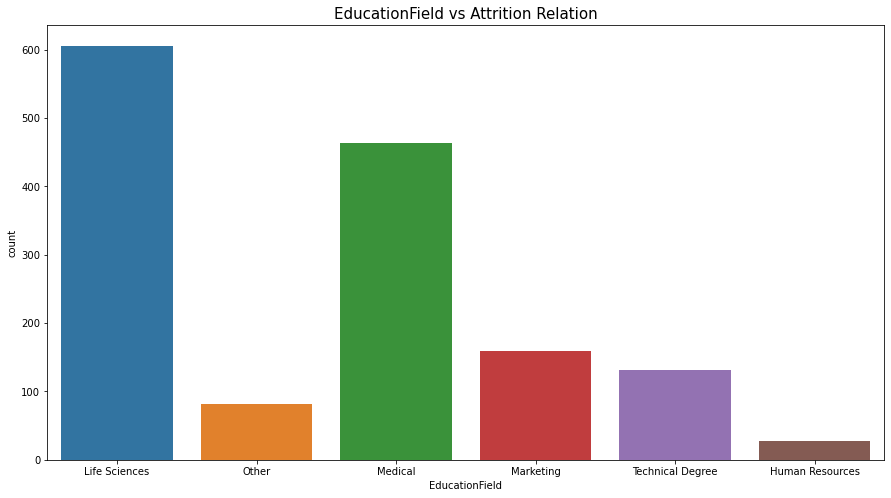

In [19]:
plt.figure(figsize=(15,8))
plt.title('EducationField vs Attrition Relation',fontsize=15)
sns.countplot(df_1['EducationField'],data=df_1[df_1['Attrition']=='Yes'])

We can see that life science and Medical two major Education fields which has higher demand in market and people are switch their job more frequent.

<AxesSubplot:title={'center':'Department vs Attrition'}, xlabel='Department', ylabel='count'>

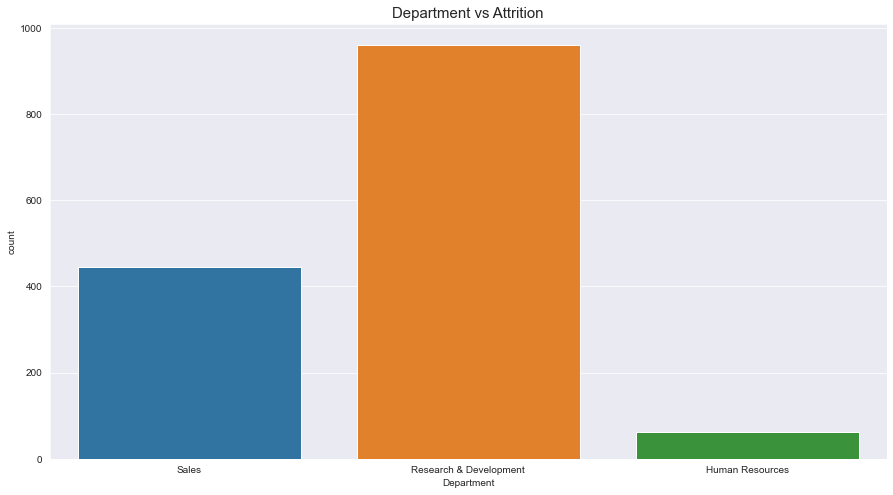

In [20]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Department vs Attrition',fontsize=15)
sns.countplot(df_1['Department'],data=df_1[df_1['Attrition']=='Yes'])

we can see that people who works in  Research & development have higher chances to leave the company.

HR department people have least chances to job change.

<AxesSubplot:title={'center':'BusinessTravel vs Attrition'}, xlabel='BusinessTravel', ylabel='count'>

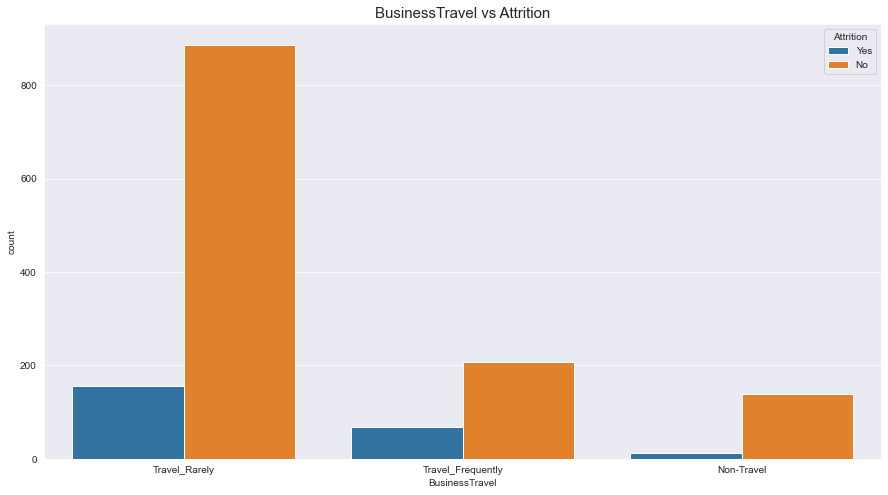

In [21]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(df_1['BusinessTravel'],hue='Attrition',data=df_1)

<AxesSubplot:title={'center':'BusinessTravel vs Attrition'}, xlabel='BusinessTravel', ylabel='count'>

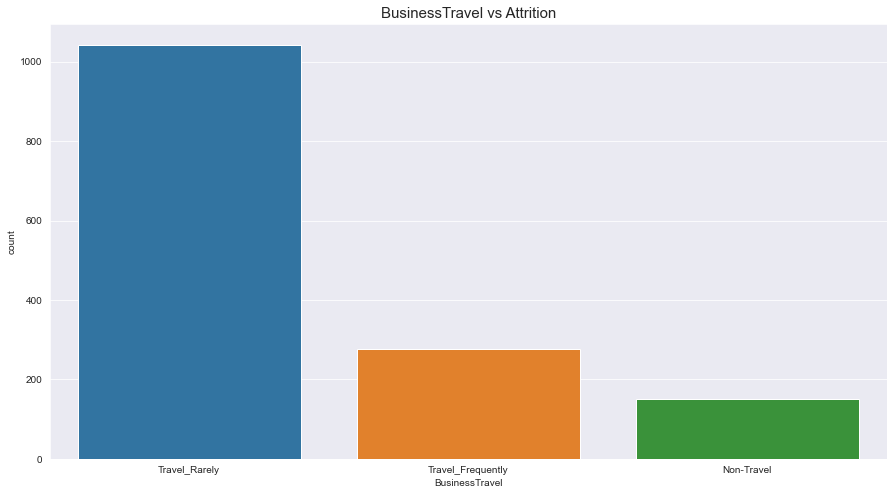

In [22]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(df_1['BusinessTravel'],data=df_1[df_1['Attrition']=='Yes'])

From above both countplot it is clear that an employee who travels rarely to other places have higher chances to left job.

<AxesSubplot:title={'center':'Age effect on Attrition'}, xlabel='Age', ylabel='count'>

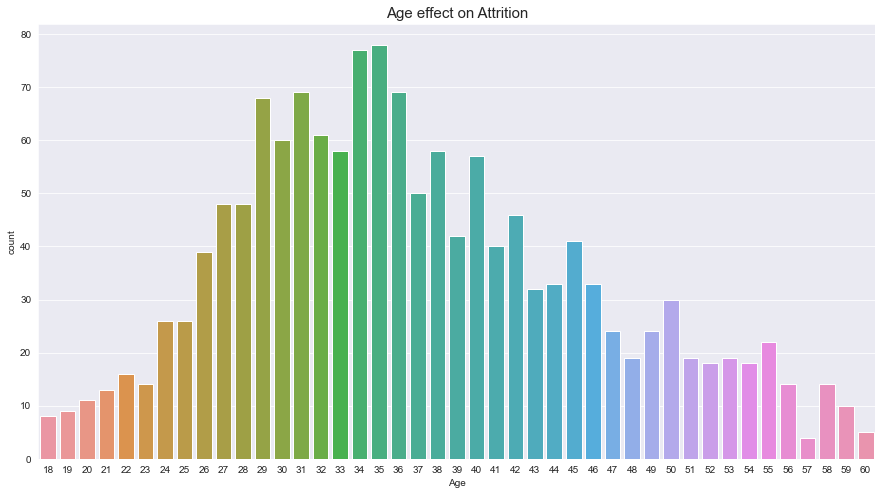

In [23]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Age effect on Attrition',fontsize=15)
sns.countplot(df_1['Age'],data=df_1[df_1['Attrition']=='Yes'])

<AxesSubplot:title={'center':'Age vs Attrition'}, xlabel='Age'>

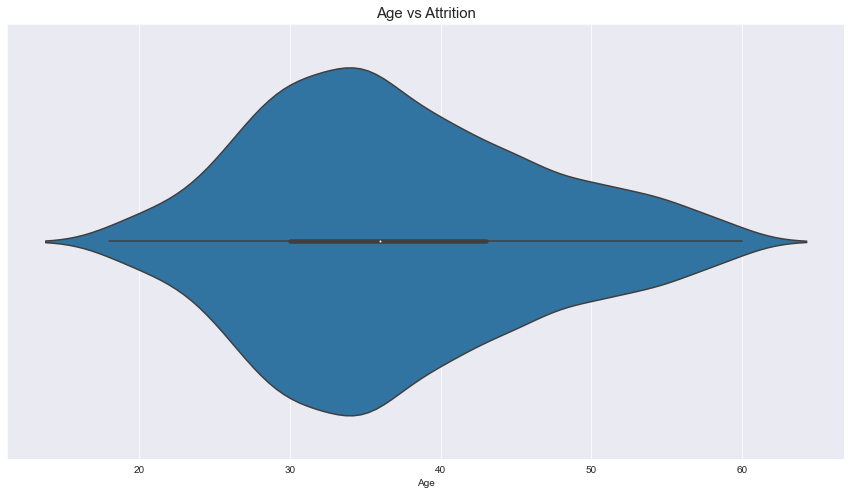

In [24]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Age vs Attrition',fontsize=15)
sns.violinplot(df_1['Age'],data=df_1[df_1['Attrition']=='Yes'])

from above two plots we can visualize that a employees whose age group is between 28-37 has highest tendency to job change.

<AxesSubplot:title={'center':'JobSatisfaction on Attrition'}, xlabel='JobSatisfaction', ylabel='count'>

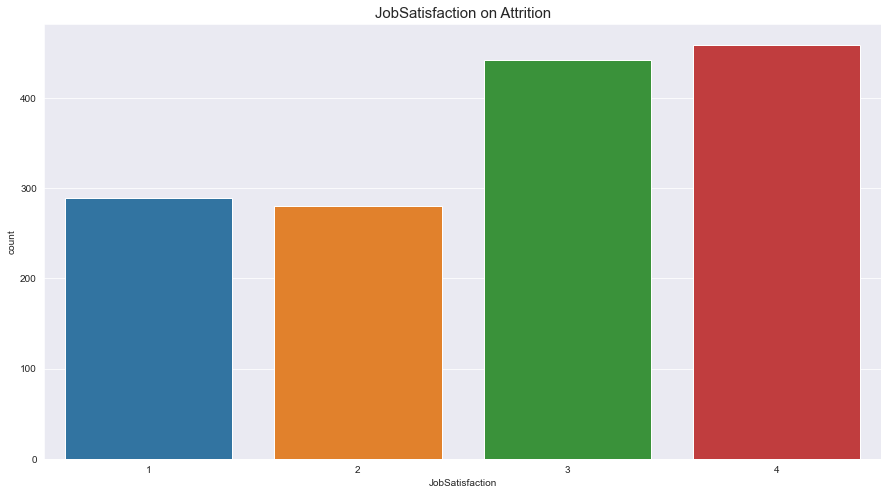

In [25]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('JobSatisfaction on Attrition',fontsize=15)
sns.countplot(df_1['JobSatisfaction'],data=df_1[df_1['Attrition']=='Yes'])

we can see that an employee with 3 or 4 job satisfaction grade has higher chance to left company.

<AxesSubplot:title={'center':'Number of years worked in company vs Attrition'}, xlabel='YearsAtCompany', ylabel='count'>

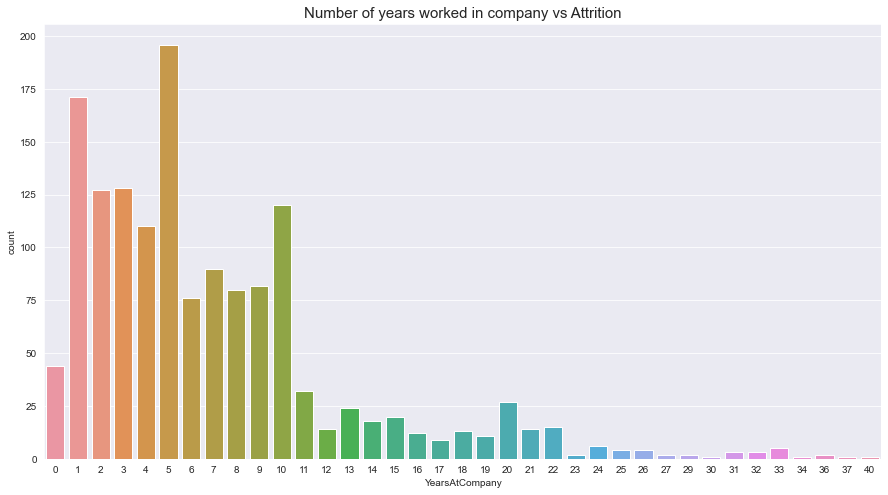

In [26]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Number of years worked in company vs Attrition',fontsize=15)
sns.countplot(df_1['YearsAtCompany'],data=df_1[df_1['Attrition']=='Yes'])

Interesting fact here we can see in our data that an employee who has worked 5 years in company, they has heighest chances to left the comapany.

Additionally,employee who has worked only 1 year in company has also the sencond most tenedency for job change.

<AxesSubplot:title={'center':'Last Promotion  vs Attrition'}, xlabel='YearsSinceLastPromotion', ylabel='count'>

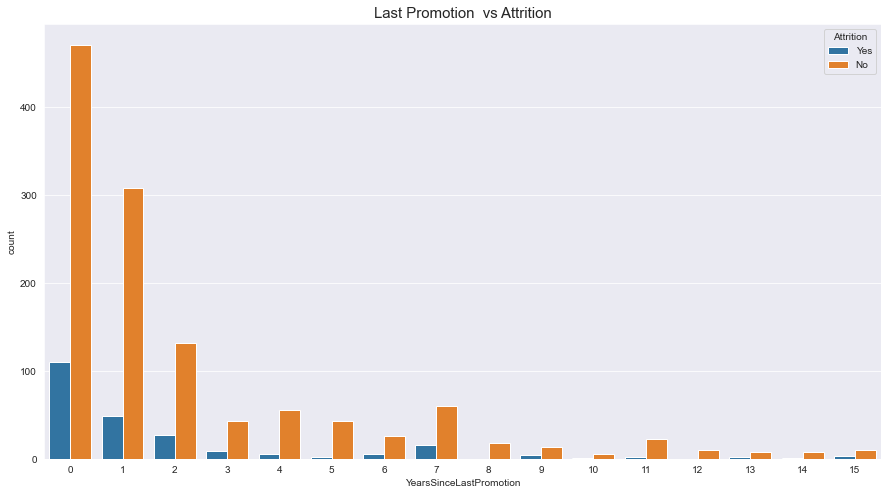

In [27]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Last Promotion  vs Attrition',fontsize=15)
sns.countplot(df_1['YearsSinceLastPromotion'],hue='Attrition',data=df_1)

We can see person who either got promoted recently or Joined recently has the highest chances of job change.

Employee who did not get promtion for 1-2 years also have a good chances for job change.

<AxesSubplot:title={'center':'Years In CurrentRole  vs Attrition'}, xlabel='YearsInCurrentRole', ylabel='count'>

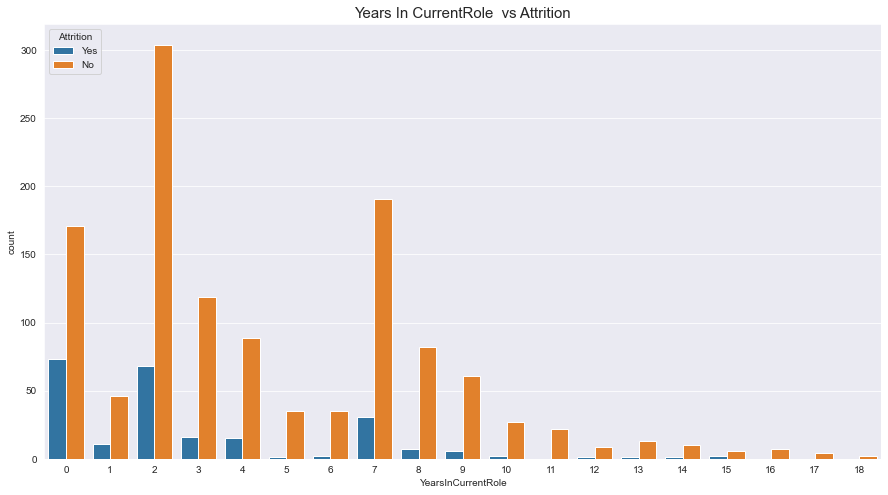

In [28]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Years In CurrentRole  vs Attrition',fontsize=15)
sns.countplot(df_1['YearsInCurrentRole'],hue='Attrition',data=df_1)

It is same as we can say that peoson who has experience of 2 years or who joined recently and woking on same profile has fair chances to left job.

<AxesSubplot:title={'center':'Work life balance vs Attrition'}, xlabel='WorkLifeBalance', ylabel='count'>

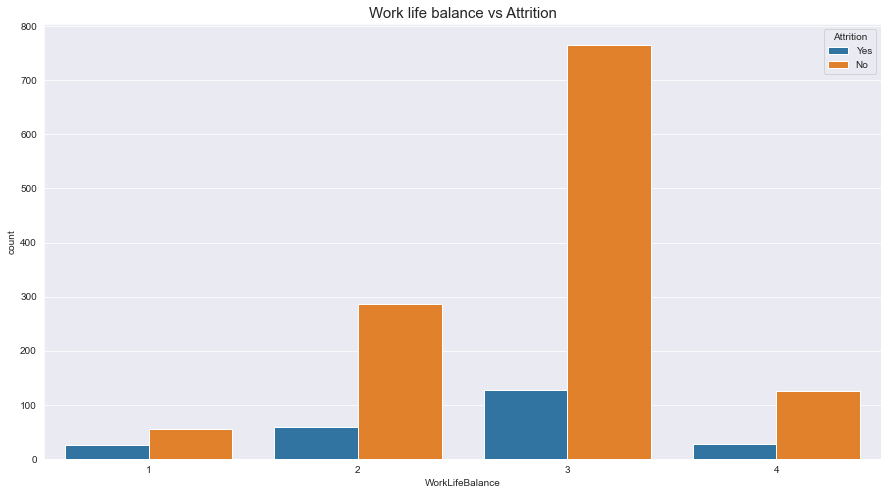

In [29]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Work life balance vs Attrition',fontsize=15)
sns.countplot(df_1['WorkLifeBalance'],hue='Attrition',data=df_1)

We can see that an employee whose worklife balance is 3, has higher chance for job change.

<AxesSubplot:title={'center':'PercentSalaryHike  vs Attrition'}, xlabel='PercentSalaryHike', ylabel='count'>

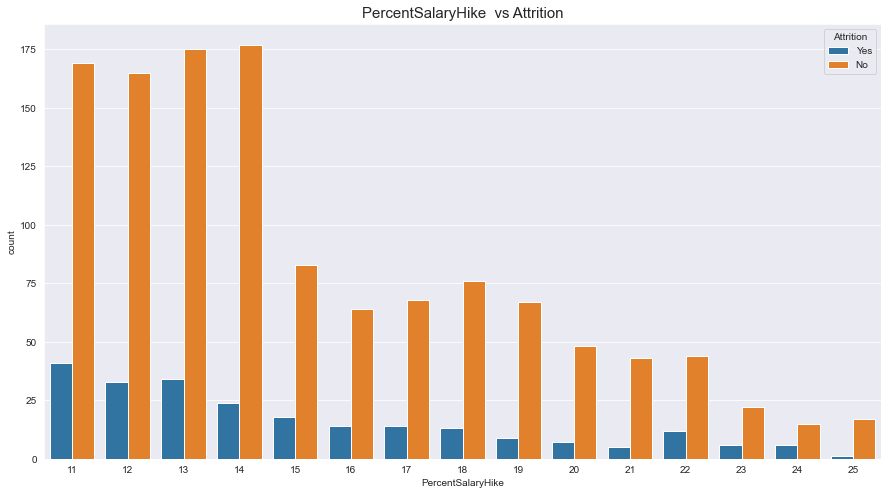

In [30]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('PercentSalaryHike  vs Attrition',fontsize=15)
sns.countplot(df_1['PercentSalaryHike'],hue='Attrition',data=df_1)

It is clearly visible that an employee who got least salary hike in year have higher tendency for job change.

<AxesSubplot:title={'center':'JobLevel vs Attrition'}, xlabel='JobLevel', ylabel='count'>

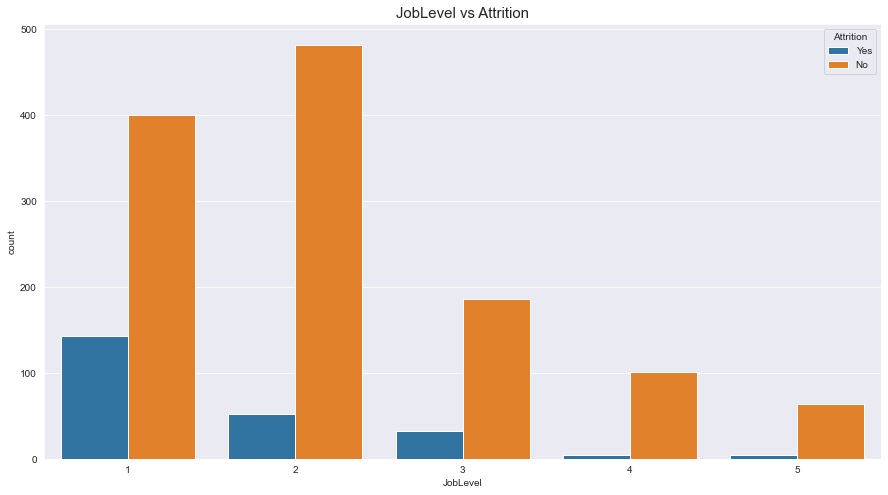

In [31]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('JobLevel vs Attrition',fontsize=15)
sns.countplot(df_1['JobLevel'],hue='Attrition',data=df_1)

we can see employee who has job band/level 1 has tendency to change job more frequent then job level 4 or 5.

<AxesSubplot:title={'center':'Monthly Income vs Attrition'}, xlabel='Attrition', ylabel='MonthlyIncome'>

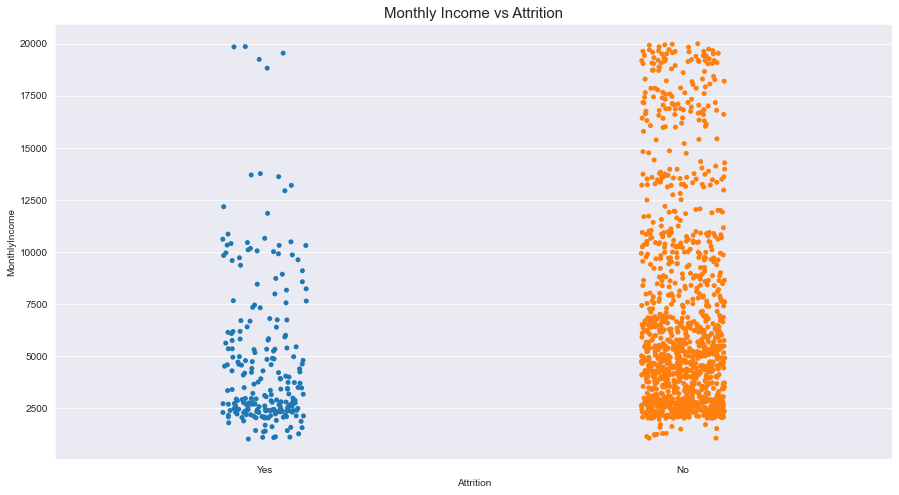

In [32]:
plt.figure(figsize=(15,8))
plt.title('Monthly Income vs Attrition',fontsize=15)
sns.stripplot(df_1['Attrition'],df_1['MonthlyIncome'],data=df_1)

we can observe that the employees whose monthly salary is below 12500 have higher chances of Job change.

<AxesSubplot:title={'center':'NumCompaniesWorked vs Attrition'}, xlabel='NumCompaniesWorked', ylabel='count'>

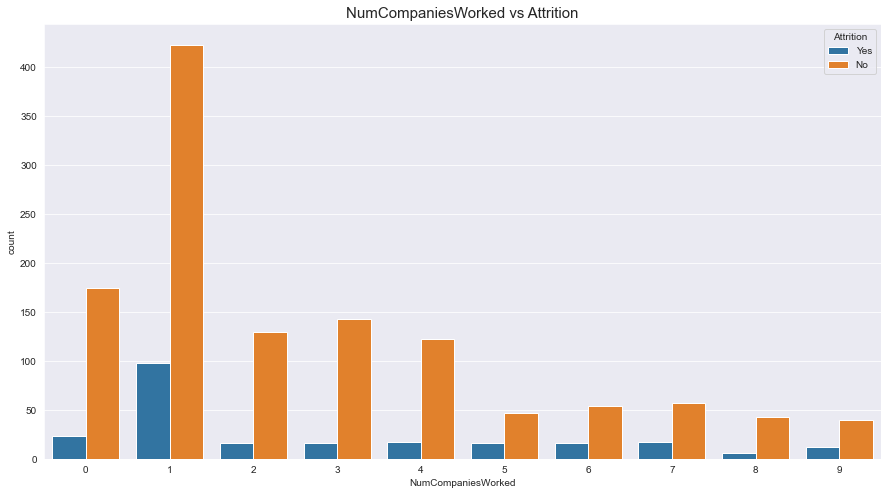

In [33]:
plt.figure(figsize=(15,8))
plt.title('NumCompaniesWorked vs Attrition',fontsize=15)
sns.countplot(df_1['NumCompaniesWorked'],hue='Attrition',data=df_1)

we can observe that an employee who has worked with 1 company previously are more looking for job change.

In [ ]:
sns.heatmap(df)

# Distribution:

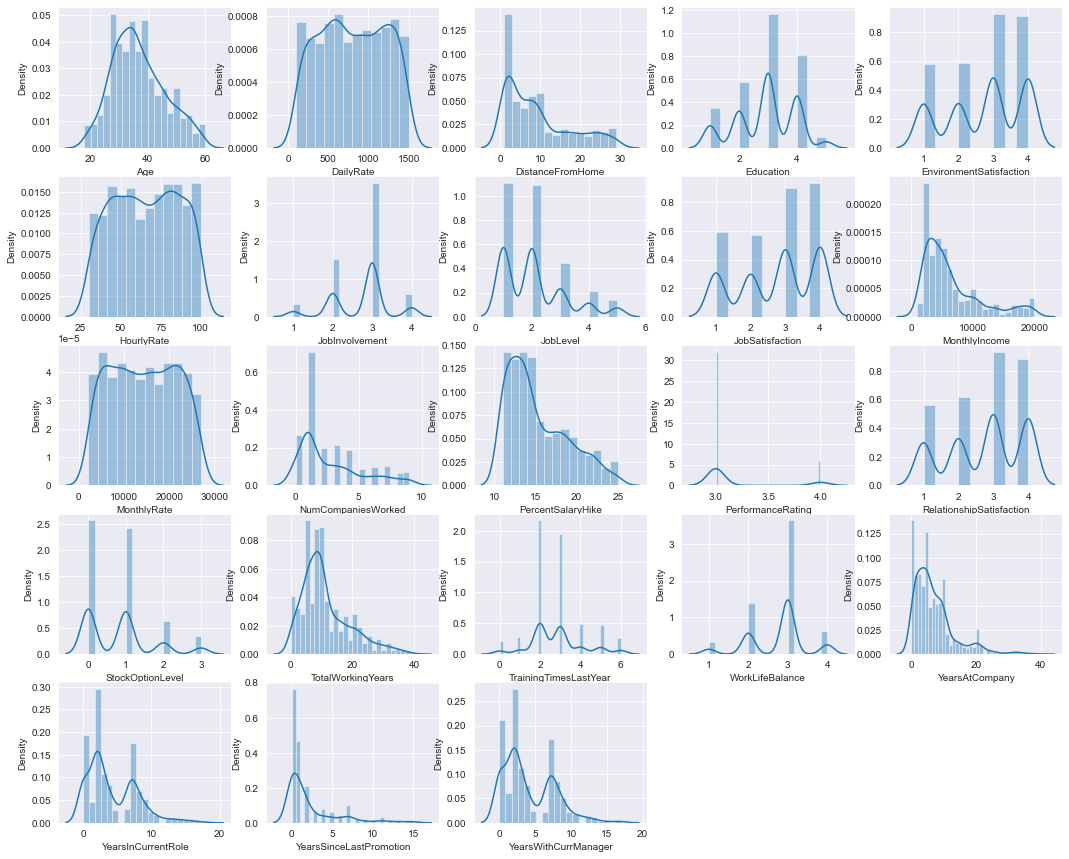

In [34]:
di=df_1.select_dtypes(exclude='object')
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.distplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()  

Observation

1- Most of our data is Normally distributed.

2- Attributes like Total working years,Yearsatcompany, Years since last promotion etc. are right skewed.

3-This shows some outliers must be present in our dataset.

4- we will remove skewness by some trasformation methods.


# Outliers Detection

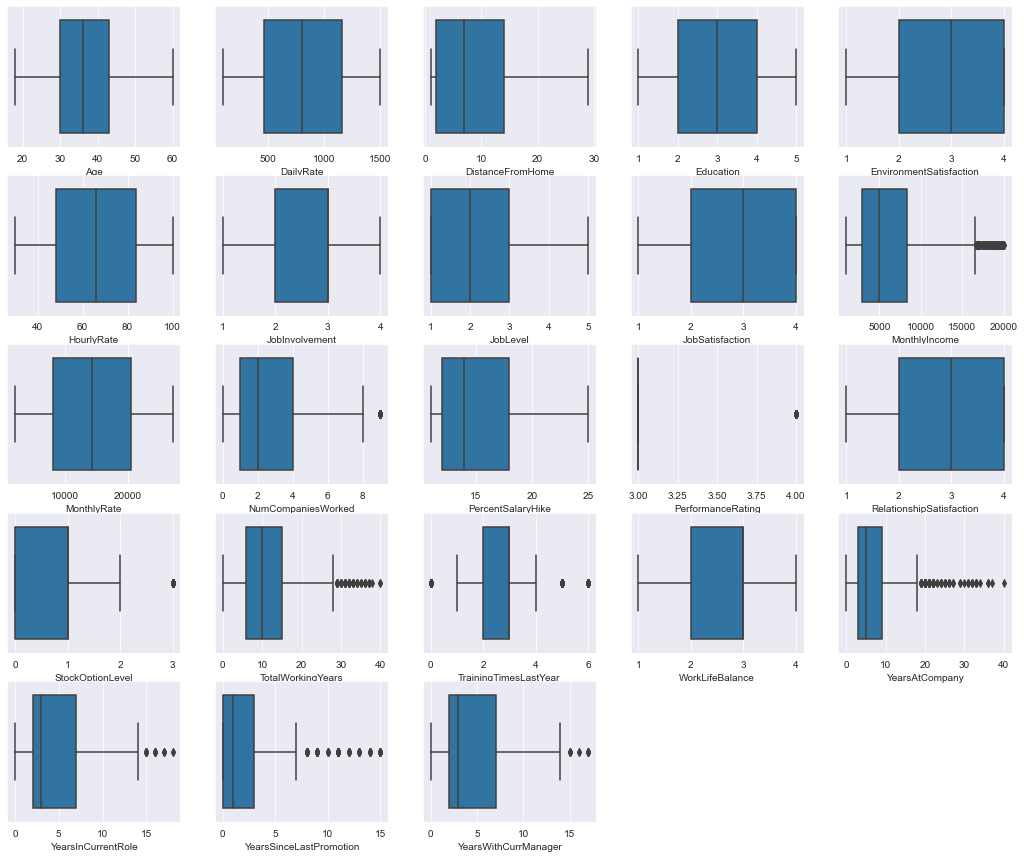

In [35]:
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.boxplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.show() 

In [36]:
## Removing Outliers
## Removing Outliers
from scipy.stats import zscore
z =np.abs(zscore(di))
print(z.shape)
df_1 = df_1.loc[(z<3).all(axis=1)]
print(df_1.shape)

(1470, 23)
(1387, 32)


# Checking skewness

In [37]:
df_1.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [38]:
for i in di:
    if df_1[i].skew()>.55:
        df_1[i]=np.log1p(df_1[i])

In [39]:
df_1.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobSatisfaction            -0.345612
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

We have removed skewness to the possible extent.

# Encoding of categorical Columns

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ob:
    df_1[col]=le.fit_transform(df_1[col])

In [41]:
df_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.693147,2,1,2,0,94,3,1.098612,7,4,2,8.698514,19479,2.197225,0,1,2.484907,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,0,1,279,1,2.197225,1,1,3,1,61,2,1.098612,6,2,1,8.543056,24907,0.693147,0,0,3.178054,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,1,2,1373,1,1.098612,2,4,4,1,92,2,0.693147,2,3,2,7.645398,2396,1.945910,0,1,2.772589,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.386294,4,1,4,0,56,3,0.693147,6,3,1,7.975908,23159,0.693147,0,1,2.484907,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,0,2,591,1,1.098612,1,3,1,1,40,3,0.693147,2,2,1,8.151622,16632,2.302585,0,0,2.564949,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612


# Splitting Data into Input and Output Variable

In [42]:
x=df_1.drop(['Attrition','Over18'],axis=1)
y=df_1[['Attrition']]

In [43]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,1,2,0,94,3,1.098612,7,4,2,8.698514,19479,2.197225,1,2.484907,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,1,3,1,61,2,1.098612,6,2,1,8.543056,24907,0.693147,0,3.178054,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,4,4,1,92,2,0.693147,2,3,2,7.645398,2396,1.945910,1,2.772589,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,1,4,0,56,3,0.693147,6,3,1,7.975908,23159,0.693147,1,2.484907,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,3,1,1,40,3,0.693147,2,2,1,8.151622,16632,2.302585,0,2.564949,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,3.178054,2,3,3,1,41,4,1.098612,2,4,1,7.852439,12290,1.609438,0,2.890372,1.386294,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,2,613,1,1.945910,1,3,4,1,42,2,1.386294,0,1,1,9.209540,21457,1.609438,0,2.772589,1.386294,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442
1467,27,2,155,1,1.609438,3,1,2,1,87,4,1.098612,4,2,1,8.723069,5174,0.693147,1,3.044522,1.609438,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,1,1023,2,1.098612,3,3,4,1,63,2,1.098612,7,2,1,8.592486,13243,1.098612,0,2.708050,1.386294,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [44]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.502086,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,0.376231,0.212494,1.007448,1.143776,1.231027,0.320432,0.734688,1.663023,1.584737,-1.303793,-0.424765,-1.575817,-1.052154,-0.052493,-3.388651,-2.501172,0.297751,0.372567,-0.964086,0.628647
1,1.442111,-0.905354,-1.307769,-0.496337,0.253886,-1.853858,-0.940815,0.251978,0.813067,-0.239091,-1.034126,0.212494,0.604178,-0.673426,-0.141509,0.073994,1.505353,-0.578551,-0.631019,1.952651,2.354241,1.199034,0.468783,0.247982,0.302431,0.336558,0.939176,0.980909,-0.028096,0.993844
2,0.083966,0.593126,1.406752,-0.496337,-1.028716,-0.876177,1.305159,1.169285,0.813067,1.290017,-1.034126,-1.066050,-1.008901,0.235175,1.231027,-1.349001,-1.690747,1.288481,1.584737,0.047753,-0.424765,-0.650866,-1.052154,-0.228855,0.302431,0.336558,-2.463747,-1.710586,-0.964086,-1.645896
3,-0.368749,-0.905354,1.453896,-0.496337,-0.692855,1.079185,-0.940815,1.169285,-1.229911,-0.485721,0.376231,-1.066050,0.604178,0.235175,-0.141509,-0.825065,1.257173,-0.578551,1.584737,-1.303793,-0.424765,0.274084,-1.052154,-0.052493,0.302431,0.336558,0.654398,0.980909,0.907895,-1.645896
4,-1.047821,0.593126,-0.533609,-0.496337,-1.028716,-1.853858,0.556501,-1.582635,0.813067,-1.274939,0.376231,-1.066050,-1.008901,-0.673426,-0.141509,-0.546519,0.330473,1.820046,-0.631019,-0.927748,-0.424765,1.199034,0.468783,-0.428798,0.302431,0.336558,-0.904674,-0.288613,0.519424,-0.251267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.398978,-0.876177,0.556501,0.251978,0.813067,-1.225613,1.786588,0.212494,-1.008901,1.143776,-0.141509,-1.020793,-0.286002,0.787026,-0.631019,0.601105,-0.424765,0.274084,0.468783,0.985391,0.302431,0.336558,0.078991,-0.288613,-0.964086,0.113930
1383,0.310324,0.593126,-0.479021,-0.496337,-0.039518,-1.853858,0.556501,1.169285,0.813067,-1.176286,-1.034126,1.119635,-1.815441,-1.582027,-0.141509,1.130526,1.015523,0.787026,-0.631019,0.047753,-0.424765,-1.575817,0.468783,0.105269,1.382003,0.336558,0.487249,0.980909,-0.028096,0.993844
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.432340,0.101504,-0.940815,-0.665328,0.813067,1.043387,1.786588,0.212494,-0.202362,-0.673426,-0.141509,0.359356,-1.296328,-0.578551,1.584737,1.325313,2.354241,-0.650866,0.468783,-0.428798,-3.388651,0.336558,0.297751,-0.288613,-0.964086,0.113930
1385,1.442111,-0.905354,0.538304,1.405373,-1.028716,0.101504,0.556501,1.169285,0.813067,-0.140439,-1.034126,0.212494,1.007448,-0.673426,-0.141509,0.152353,-0.150696,0.025726,-0.631019,-0.255452,-0.424765,1.199034,-1.052154,0.985391,0.302431,-1.082307,0.803919,0.808075,-0.964086,1.143363


# Feature Importance

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [47]:
print(extra.feature_importances_)

[0.04051191 0.02470043 0.03268829 0.0253897  0.03605149 0.02576968
 0.0284176  0.03781134 0.02107644 0.03160177 0.03273484 0.03273685
 0.03061496 0.03898473 0.03264027 0.04573891 0.02938884 0.02973754
 0.07141687 0.02924678 0.01336056 0.03241294 0.03590452 0.04206834
 0.03149271 0.03355954 0.03472741 0.03444957 0.02861862 0.03614656]


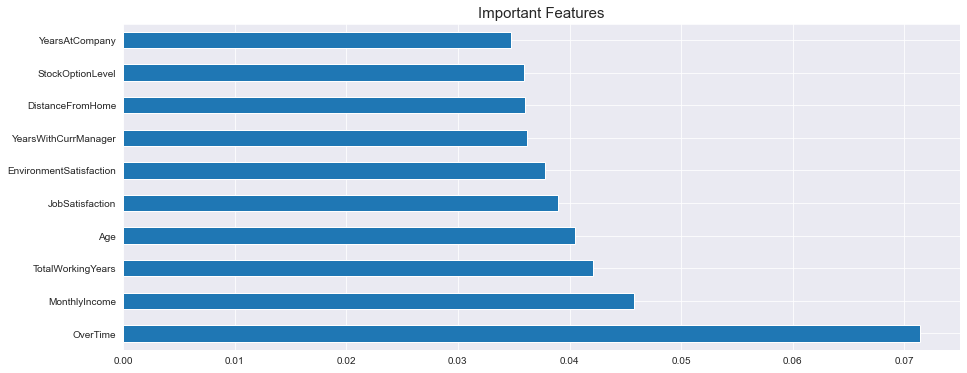

In [48]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [49]:
x.shape

(1387, 30)

We can see that over time , age and Monthly Income are 3 major attributed which decide whether employee will leave or Not.

# PCA

In [50]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_matrix=PCA(n_components=30)

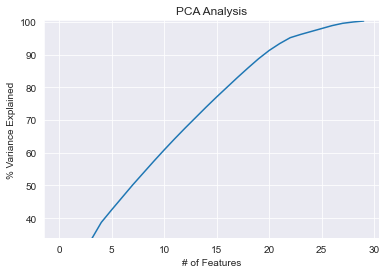

In [51]:
#Calculate Eigenvalues
covar_matrix.fit(x)  ## x should be scaled
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
## draw the graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

Based on the plot above it's clear we should pick 27 features at 99% variance.

In [52]:
pca=PCA(n_components=27)
x=pca.fit_transform(x)
x.shape

(1387, 27)

# Model Building

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

In [124]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    return final_r

In [125]:
## Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max accuracy score corresponding to 60 is 0.8453237410071942


cross validation score 0.8774407189050205


Standard Deviation 0.01341848060994502


F1 score 0.5693430656934306


Training accuracy 0.7786177105831533


Test Accuracy 0.7877697841726619


Confusion Matrix [[180  52]
 [  7  39]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.78      0.86       232
           1       0.43      0.85      0.57        46

    accuracy                           0.79       278
   macro avg       0.70      0.81      0.71       278
weighted avg       0.87      0.79      0.81       278



Roc_auc Score 0.8118440779610194


60

In [126]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 72 is 0.7985611510791367


cross validation score 0.7757759135651768


Standard Deviation 0.016844183212447947


F1 score 0.4067796610169491


Training accuracy 1.0


Test Accuracy 0.7482014388489209


Confusion Matrix [[184  48]
 [ 22  24]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.79      0.84       232
           1       0.33      0.52      0.41        46

    accuracy                           0.75       278
   macro avg       0.61      0.66      0.62       278
weighted avg       0.80      0.75      0.77       278



Roc_auc Score 0.6574212893553224


72

In [127]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 50 is 0.7122302158273381


cross validation score 0.8507648754642496


Standard Deviation 0.007260612452108379


F1 score 0.4049079754601227


Training accuracy 0.8628509719222462


Test Accuracy 0.6510791366906474


Confusion Matrix [[148  84]
 [ 13  33]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.64      0.75       232
           1       0.28      0.72      0.40        46

    accuracy                           0.65       278
   macro avg       0.60      0.68      0.58       278
weighted avg       0.81      0.65      0.70       278



Roc_auc Score 0.6776611694152924


50

In [128]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 66 is 0.8345323741007195


cross validation score 0.8716645456198219


Standard Deviation 0.0018173276381763246


F1 score 0.5084745762711865


Training accuracy 0.796976241900648


Test Accuracy 0.7913669064748201


Confusion Matrix [[190  42]
 [ 16  30]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.82      0.87       232
           1       0.42      0.65      0.51        46

    accuracy                           0.79       278
   macro avg       0.67      0.74      0.69       278
weighted avg       0.84      0.79      0.81       278



Roc_auc Score 0.7355697151424289


66

In [129]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 68 is 0.8741007194244604


cross validation score 0.8514868971248994


Standard Deviation 0.002987055767248576


F1 score 0.3943661971830986


Training accuracy 1.0


Test Accuracy 0.8453237410071942


Confusion Matrix [[221  11]
 [ 32  14]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.95      0.91       232
           1       0.56      0.30      0.39        46

    accuracy                           0.85       278
   macro avg       0.72      0.63      0.65       278
weighted avg       0.82      0.85      0.83       278



Roc_auc Score 0.6284670164917542


68

In [130]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 60 is 0.8057553956834532


cross validation score 0.856541048749448


Standard Deviation 0.011722526985238695


F1 score 0.4444444444444444


Training accuracy 0.8412526997840173


Test Accuracy 0.7482014388489209


Confusion Matrix [[180  52]
 [ 18  28]]


Classification Report               precision    recall  f1-score   support

           0       0.91      0.78      0.84       232
           1       0.35      0.61      0.44        46

    accuracy                           0.75       278
   macro avg       0.63      0.69      0.64       278
weighted avg       0.82      0.75      0.77       278



Roc_auc Score 0.6922788605697152


60

In [131]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

max accuracy score corresponding to 81 is 0.8525179856115108


cross validation score 0.8630106744928966


Standard Deviation 0.007822284163017449


F1 score 0.5192307692307693


Training accuracy 0.964902807775378


Test Accuracy 0.8201438848920863


Confusion Matrix [[201  31]
 [ 19  27]]


Classification Report               precision    recall  f1-score   support

           0       0.91      0.87      0.89       232
           1       0.47      0.59      0.52        46

    accuracy                           0.82       278
   macro avg       0.69      0.73      0.70       278
weighted avg       0.84      0.82      0.83       278



Roc_auc Score 0.726667916041979


81

In [133]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','Naive Bayes','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[84.53,79.85,71.22,83.45,87.41,80.57,85.25],
                         'F1_Score':[56.93,40.67,40.49,50.84,39.43,44.44,51.92],
                         'Roc_Auc score':[81.18,65.74,67.76,73.55,62.84,69.22,72.66],
                         'Cross_validation':[87.74,77.57,85.07,87.16,85.14,85.65,86.30]})
best_model                        

,Model,Accuracy Score,F1_Score,Roc_Auc score,Cross_validation
0,LogisticRegression,84.53,56.93,81.18,87.74
1,DecisionTreeClassifier,79.85,40.67,65.74,77.57
2,Naive Bayes,71.22,40.49,67.76,85.07
3,GaussianNB,83.45,50.84,73.55,87.16
4,RandomForestClassifier,87.41,39.43,62.84,85.14
5,AdaBoostClassifier,80.57,44.44,69.22,85.65
6,GradientBoostingClassifier,85.25,51.92,72.66,86.30


From the above table we can see that Logistic Regression gives us a F-1 score among all other MOdels. Additionally, Roc_auc score is Heighest among all the Models. We can see that the accuracy score for logistic Regression Model is also Good.

So considering  all parameters like f1 score,roc_auc score and accuracy score our final model will be Logistic Regression.

# Hyperparameter Tuning

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=.20,stratify=y)
## Upsampling
x_train_s,y_train_s=SMOTE().fit_resample(x_train,y_train)
lg=LogisticRegression()
param={'penalty':['l2','l1'],'C':[.0001,.001,.01,1,10],'solver':['liblinear','saga']}

grid=GridSearchCV(estimator=lg,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train_s,y_train_s)

grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [139]:
lg_final=LogisticRegression(C=10,penalty='l2',solver='liblinear')
lg_final.fit(x_train_s,y_train_s)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.8345323741007195


Final f_1 score : 0.634920634920635


Final roc_auc score : 0.7348484848484849


Final classification Report :               precision    recall  f1-score   support

           0       0.83      0.97      0.89       198
           1       0.87      0.50      0.63        80

    accuracy                           0.83       278
   macro avg       0.85      0.73      0.76       278
weighted avg       0.84      0.83      0.82       278



Final confusion Matrix : [[192   6]
 [ 40  40]]


WE can see that our f1_score is improved from 56.93 to 63.49 so we have improve our f1 score by hyperparameter tuning.
We will save this as our final Model.

# Saving model


In [140]:
import joblib
joblib.dump(lg_final,'Attrition_lg.pkl')

['Attrition_lg.pkl']

# Loading Our Model

In [141]:
loaded_model=joblib.load('Attrition_lg.pkl')
prediction=loaded_model.predict(x_test)